In [2]:
import blackjackSim as bjs
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np

In [3]:
hitbutton = widgets.Button(description = "Hit",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Hit",
                          icon = "hand-fist")

def hbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    game.hit()
    
hitbutton.on_click(hbc) #runs hbc(hitbutton) when you click the hit button

staybutton = widgets.Button(description = "Stand",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Stand",
                          icon = "hand")

def sbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    game.stay()
    
staybutton.on_click(sbc) #runs sbc(staybutton) when you click the stay button

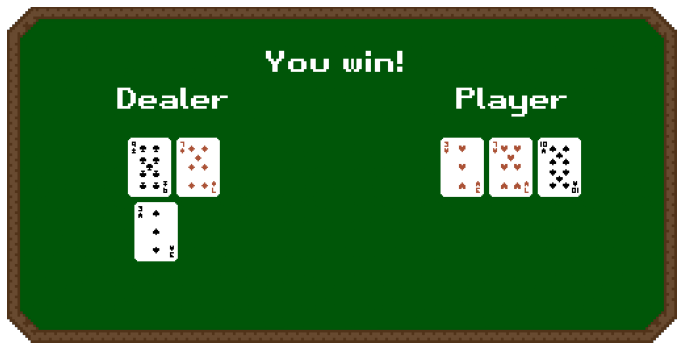

In [4]:
game = bjs.Blackjack(draw = True)

display(hitbutton)
display(staybutton)

In [4]:
game.aces()

0

In [5]:
import random

def sim_winrate(threshold): #simulation loop as a function of how often the player stays
    hit_threshold = threshold

    n_wins = 0
    iterations = 30000
    win = []
    aces = []
    points = []
    dealer_card = []

    hit = []
    round_ = []
    game_number = []

    current_game = 1
    instant_gameovers = 0
    for i in range(iterations):
        game = bjs.Blackjack()
        current_round = 0
        if game.is_active == False:
            instant_gameovers += 1
            current_game += 1
            continue
        else:
            while game.is_active == True:
                if game.point() < 11:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                elif random.random() > hit_threshold:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                else:
                    game.stay()
                    hit.append(0)
                    current_round += 1

                points.append(game.point())
                dealer_card.append(game.dealer[0])
                aces.append(game.aces())
                round_.append(current_round)

            for j in range(current_round): #assigning win and game labels to all turns
                game_number.append(current_game)
                win.append(game.player_win)
            
            if game.player_win == True:
                n_wins += 1
            
            current_game += 1
    
    return n_wins/iterations


In [6]:
thresholds = []
winrates = []
for i in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.00]: #
    winrate = sim_winrate(i)
    print(f"Threshold: {i}, Winrate: {winrate}")
    thresholds.append(i)
    winrates.append(winrate)

Threshold: 0.0, Winrate: 0.0
Threshold: 0.1, Winrate: 0.020666666666666667
Threshold: 0.2, Winrate: 0.04203333333333333
Threshold: 0.3, Winrate: 0.054233333333333335
Threshold: 0.4, Winrate: 0.0699
Threshold: 0.5, Winrate: 0.0739
Threshold: 0.6, Winrate: 0.08606666666666667
Threshold: 0.7, Winrate: 0.0882
Threshold: 0.8, Winrate: 0.0911


KeyboardInterrupt: 

Text(0.5, 0, 'Rate of staying')

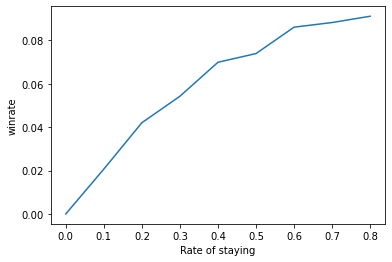

In [7]:
plt.plot(thresholds, winrates)
plt.ylabel("winrate")
plt.xlabel("Rate of staying")

In [8]:
hit_threshold = 0.7 #if random.random() is above this number, hit
n_wins = 0 #number of wins
iterations = 100000 #number of games to simulate
#Simulation output
win = [] # Win(1), Loss(0)
aces = [] # Number of aces in player's hand
points = [] # Number of points the player's hand is worth
dealer_card = [] # Value/rank of dealer's face-up card

hit = [] # Whether the player did hit or stay
round_ = [] # Which round of the game it is, where the first round of the game is 1
game_number = [] # Number assigned to that game

current_game = 1 # Number assigned to that game
instant_gameovers = 0 # How many times the game is won just from the dealing of cards, e.g. player or dealer receives 21
for i in range(iterations):
    game = bjs.Blackjack() #initialize game
    current_round = 0
    if game.is_active == False: # Only activated in case of an instant game over
        instant_gameovers += 1
        current_game += 1
        continue
    else:
        while game.is_active == True: # While the game still hasn't ended:
            if game.point() < 11: # Always hit if you have 10 points or less, it's impossible to lose
                game.hit()
                hit.append(1)
                current_round += 1
            elif random.random() > hit_threshold: # Hit if above threshold
                game.hit()
                hit.append(1)
                current_round += 1
            else: # Stay if below threshold
                game.stay()
                hit.append(0)
                current_round += 1

            #Add features to lists
            points.append(game.point())
            dealer_card.append(game.dealer[0])
            aces.append(game.aces())
            round_.append(current_round)

        for j in range(current_round): #assigning win and game labels to all turns
            game_number.append(current_game)
            win.append(game.player_win)

        if game.player_win == True:
            n_wins += 1

        current_game += 1

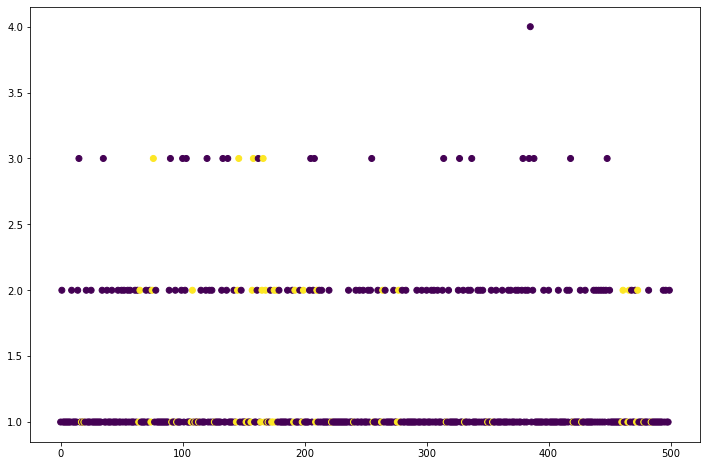

In [10]:
#Coloring graph to visualize winning games and rounds
n_turns = 500 #number of turns to graph
win_colors = []
for i in win:
    win_colors.append(int(i))

plt.figure(figsize = (12,8))
plt.scatter(np.arange(len(round_))[:n_turns], round_[:n_turns], c = win_colors[:n_turns])

In [109]:
label = [] #list of labels. If 1, then either a hit resulted in a win, or a stay resulted in a loss. If 0, then either a
           #stay resulted in a win, or a hit resulted in a loss. This is a big assumption, and how accurate it is will
           #determine how well the model can play blackjack
for i in range(len(win)):
    if win[i] == 0:
        if hit[i] == 0:
            label.append(1) #should've hit
        elif hit[i] == 1:
            label.append(0) #should've stayed
    elif win[i] == 1:
        label.append(hit[i]) #did the right thing, so just add that

In [121]:
np.array(dealer_card)[:,1]

array(['Jack', 'Queen', '3', ..., '4', 'Jack', 'Jack'], dtype='<U8')

In [131]:
import pandas as pd
data = pd.DataFrame()
data["label"] = label
data["win"] = win
data["points"] = points
data["aces"] = aces


data["dealer card"] = np.array(dealer_card)[:,1]
data["dealer card"] = data["dealer card"].replace({"Jack":10, "Queen":10, "King":10, "Ace":11}) #Change names to numbers
data["dealer card"] = pd.to_numeric(data["dealer card"]) #Change series dtype from string to a numeric 
data["round"] = round_
data["game number"] = game_number

In [141]:
win_data = data[ data["win"] == True]
loss_data = data[ data["win"] == False]

from sklearn.model_selection import train_test_split

In [140]:
test_rounds = len(win_data)/2 # 50% test size for win data
loss_proportion = test_rounds/len(loss_data) # this portion test size for loss data

#Split winning and losing data using train_test_split() so they have the same size
features_train_w, features_test_w, labels_train_w, labels_test_w = train_test_split()

(13441, 108904)

In [148]:
win_data

,label,win,points,aces,dealer card,round,game number
5,0,True,20,0,9,1,7
24,0,True,20,0,10,1,25
52,0,True,19,1,10,1,44
55,0,True,18,0,6,1,47
70,0,True,20,1,5,1,58
...,...,...,...,...,...,...,...
122306,1,True,20,0,4,1,99974
122307,0,True,20,0,4,2,99974
122308,0,True,19,0,8,1,99975
122324,1,True,21,0,2,1,99987
